In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:\\datasets\\archive (1)\\PlayTennis.csv")

In [4]:
t = df.keys()[-1]
print('Target Attribute is   ➡ ', t)

attribute_names = list(df.keys())

attribute_names.remove(t) 

print('Predicting Attributes ➡ ', attribute_names)

Target Attribute is   ➡  Play Tennis
Predicting Attributes ➡  ['Outlook', 'Temperature', 'Humidity', 'Wind']


In [5]:
import math
def entropy(probs):  
    return sum( [-prob*math.log(prob, 2) for prob in probs])

def entropy_of_list(ls,value):  
    from collections import Counter
    
    total_instances = len(ls)  
    print("---------------------------------------------------------")
    print("\nTotal no of instances/records associated with '{0}' is ➡ {1}".format(value,total_instances))

    cnt = Counter(x for x in ls)
    print('\nTarget attribute class count(Yes/No)=',dict(cnt))
    
    probs = [x / total_instances for x in cnt.values()]  
    print("\nClasses➡", max(cnt), min(cnt))
    print("\nProbabilities of Class 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Probabilities of Class 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))
    
    return entropy(probs) 

In [6]:
def information_gain(df, split_attribute, target_attribute,battr):
    print("\n\n----- Information Gain Calculation of",split_attribute,"----- ") 
    
    df_split = df.groupby(split_attribute) 
    glist=[]
    for gname,group in df_split:
        print('Grouped Attribute Values \n',group)
        print("---------------------------------------------------------")
        glist.append(gname) 
    
    glist.reverse()
    nobs = len(df.index) * 1.0   
    df_agg1=df_split.agg({target_attribute:lambda x:entropy_of_list(x, glist.pop())})
    df_agg2=df_split.agg({target_attribute :lambda x:len(x)/nobs})
    
    df_agg1.columns=['Entropy']
    df_agg2.columns=['Proportion']
    
    new_entropy = sum( df_agg1['Entropy'] * df_agg2['Proportion'])
    if battr !='S':
        old_entropy = entropy_of_list(df[target_attribute],'S-'+df.iloc[0][df.columns.get_loc(battr)])
    else:
        old_entropy = entropy_of_list(df[target_attribute],battr)
    return old_entropy - new_entropy

In [7]:
def id3(df, target_attribute, attribute_names, default_class=None,default_attr='S'):
    
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute])
    
    if len(cnt) == 1:
        return next(iter(cnt))  
    
    elif df.empty or (not attribute_names):
        return default_class  
    
    else:
        default_class = max(cnt.keys()) 
        gainz=[]
        for attr in attribute_names:
            ig= information_gain(df, attr, target_attribute,default_attr)
            gainz.append(ig)
            print('\nInformation gain of','“',attr,'”','is ➡', ig)
            print("=========================================================")
        
        index_of_max = gainz.index(max(gainz))              
        best_attr = attribute_names[index_of_max]           
        print("\nList of Gain for arrtibutes:",attribute_names,"\nare:", gainz,"respectively.")
        print("\nAttribute with the maximum gain is ➡", best_attr)
        print("\nHence, the Root node will be ➡", best_attr)
        print("=========================================================")

        remaining_attribute_names =[i for i in attribute_names if i != best_attr]
        
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,target_attribute, remaining_attribute_names,default_class,best_attr)
            tree[best_attr][attr_val] = subtree
        return tree

In [8]:
def entropy_dataset(a_list):  
    from collections import Counter

    cnt = Counter(x for x in a_list)   
    num_instances = len(a_list)*1.0   
    print("\nNumber of Instances of the Current Sub-Class is {0}".format(num_instances ))
    
    probs = [x / num_instances for x in cnt.values()]  
    print("\nClasses➡", "'p'=",max(cnt), "'n'=",min(cnt))
    print("\nProbabilities of Class 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Probabilities of Class 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))
    
    return entropy(probs) 
    
print("Entropy calculation for input dataset:\n")
print(df['Play Tennis'])

total_entropy = entropy_dataset(df['Play Tennis'])
print("\nTotal Entropy(S) of Play Tennis Dataset➡", total_entropy)
print("=========================================================")

from pprint import pprint
tree = id3(df,t,attribute_names)
print("\nThe Resultant Decision Tree is: ⤵\n")
pprint(tree)

attribute = next(iter(tree))
print("\nBest Attribute ➡",attribute)
print("Tree Keys      ➡",tree[attribute].keys())

Entropy calculation for input dataset:

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object

Number of Instances of the Current Sub-Class is 14.0

Classes➡ 'p'= Yes 'n'= No

Probabilities of Class 'p'='Yes' ➡ 0.6428571428571429
Probabilities of Class 'n'='No'  ➡ 0.35714285714285715

Total Entropy(S) of Play Tennis Dataset➡ 0.9402859586706309


----- Information Gain Calculation of Outlook ----- 
Grouped Attribute Values 
      Outlook Temperature Humidity    Wind Play Tennis
2   Overcast         Hot     High    Weak         Yes
6   Overcast        Cool   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
---------------------------------------------------------
Grouped Attribute Values 
    Outlook Temperature Humidity    Wind Play Tennis
3     Rain        Mild     High    Weak       

NameError: name 'tree' is not defined

In [9]:
from sklearn import preprocessing
my_label=preprocessing.LabelEncoder()
df['Outlook']=my_label.fit_transform(df['Outlook'])

df['Temperature']=my_label.fit_transform(df['Temperature'])

df['Humidity']=my_label.fit_transform(df['Humidity'])

df['Wind']=my_label.fit_transform(df['Wind'])

df['Play Tennis']=my_label.fit_transform(df['Play Tennis'])

In [ ]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [10]:
X=df[['Outlook','Temperature','Humidity','Wind',]]
y=df['Play Tennis']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

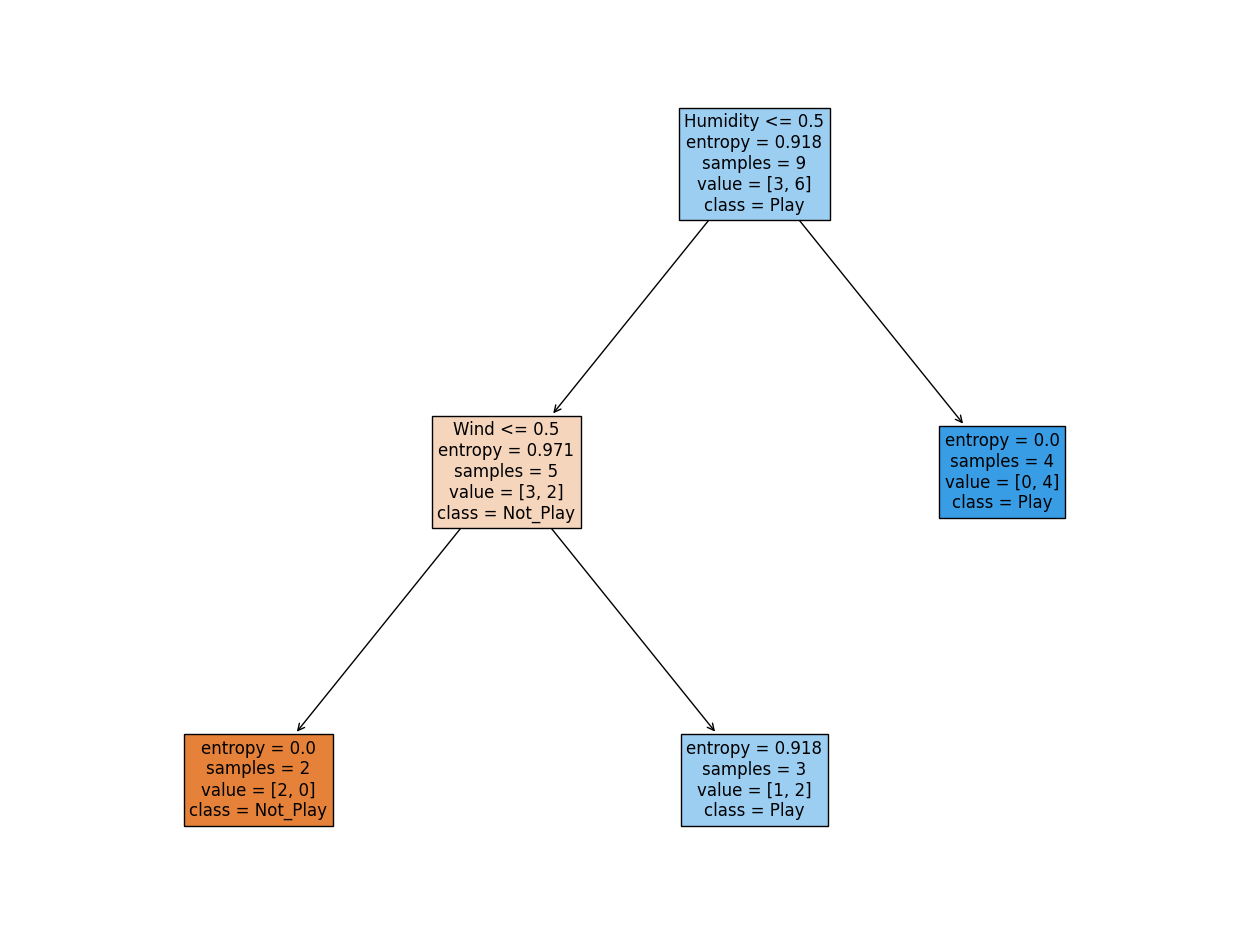

In [13]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=X.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7500


In [16]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
hello=confusion_matrix(y_test,y_pred_100)
hello

array([[1, 0],
       [1, 2]], dtype=int64)

<Axes: >

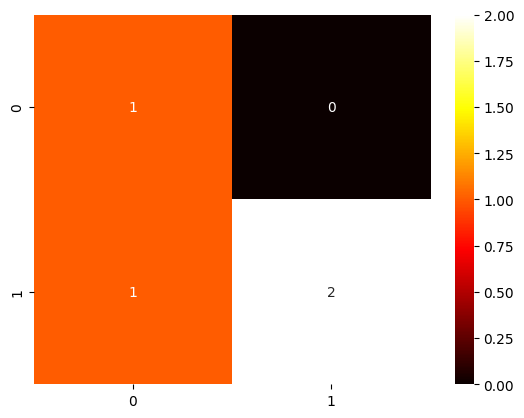

In [17]:
import seaborn as sns
sns.heatmap(hello,cmap='hot',annot=True)

In [19]:
print(accuracy_score(y_test,y_pred_100))

0.75


In [20]:
print(precision_score(y_test,y_pred_100))

1.0


In [21]:
print(recall_score(y_test,y_pred_100))

0.6666666666666666


In [22]:
print(f1_score(y_test,y_pred_100))

0.8
